In [1]:
pip install mip

   ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.3 MB 330.3 kB/s eta 0:00:47
   ---------------------------------------- 0.0/15.3 MB 281.8 kB/s eta 0:00:55
   ---------------------------------------- 0.1/15.3 MB 363.1 kB/s eta 0:00:42
   ---------------------------------------- 0.1/15.3 MB 363.1 kB/s eta 0:00:42
   ---------------------------------------- 0.1/15.3 MB 363.1 kB/s eta 0:00:42
   ---------------------------------------- 0.1/15.3 MB 363.1 kB/s eta 0:00:42
   ---------------------------------------- 0.1/15.3 MB 238.1 kB/s eta 0:01:04
   ---------------------------------------- 0.1/15.3 MB 261.9 kB/s eta 0:00:58
   ---------------------------------------- 0.1/15.3 MB 261.9 kB/s eta 0:00:58
   ---------------------------------------- 0.1/15.3 MB 261.9 kB/s eta 0:00:58
   ---------------------------------------- 0.1/15.3 MB 261.9 kB/s eta


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import random 
import math
import matplotlib.pyplot as plt

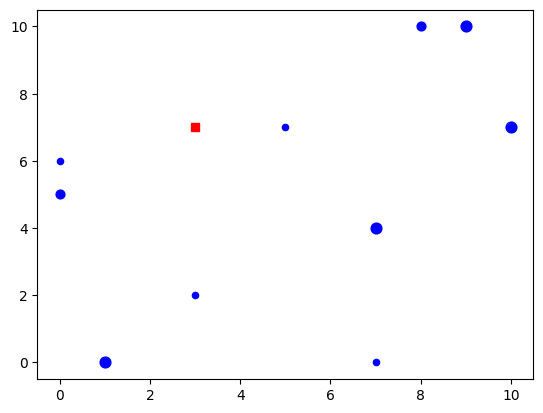

3


In [34]:
N=10
V=set(range(N+1))
location=[(random.randint(0,10),random.randint(0,10))]
plt.plot(location[-1][0],location[-1][1],'rs')

d=[0]
for i in V-{0}:
    location.append(((random.randint(0,10),random.randint(0,10))))
    d.append((random.randint(1,3)))
    plt.scatter(location[-1][0],location[-1][1],d[-1]*20,'b')

plt.show()

def distance(a,b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
c=[[0 if i==j 
    else distance(location[i],location[j])
    for j in V] for i in V]
Capacity=8
M=math.ceil(sum(d)/Capacity)
print(M)

Objective: 51.37


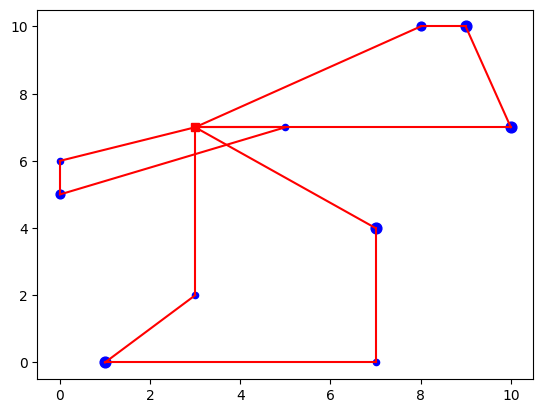

In [35]:
import mip
import itertools

model = mip.Model(solver_name=mip.CBC)

x = [[model.add_var(var_type=mip.BINARY) for j in V] for i in V]

model.objective = mip.minimize(mip.xsum(c[i][j] * x[i][j] for i in V for j in V)) #Minimize the total distance 
#each customer is visited exactly once by a vehicle.
for i in V - {0}:
    model += mip.xsum(x[i][j] for j in V - {i}) == 1
    model += mip.xsum(x[j][i] for j in V - {i}) == 1
#exactly M vehicles leave and return to the depot.
model += mip.xsum(x[0][j] for j in V - {0}) == M
model += mip.xsum(x[i][0] for i in V - {0}) == M
#ensuring that each subset of customers is connected to the rest of the network, based on vehicle capacity.
for r in range(1, N):
    for S in itertools.combinations(V - {0}, r):
        S = set(S)
        NS = V - S
        demand = sum(d[i] for i in S)
        model += mip.xsum(x[i][j] for i in S for j in NS) >= math.ceil(demand / Capacity)

model.optimize()

if model.num_solutions:
    print('Objective: %.2f' % model.objective_value)

    for i in V:
        if i == 0:
            plt.plot(location[0][0], location[0][1], 'rs')
        else:
            plt.scatter(location[i][0], location[i][1], d[i] * 20, 'b')
        for j in V:
            if x[i][j].x > 0.9:
                plt.plot([location[i][0], location[j][0]], [location[i][1], location[j][1]], 'r')
    plt.show()
